<a href="https://colab.research.google.com/github/Yahred/evolutionary-computation/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##IMPORTANCIÓN DE HERRAMIENTAS (BIBLIOTECAS)

# 1.   Pandas:

###    Herramienta de manipulación y análisis de datos (https://pandas.pydata.org)
# 2.   Matplotlib y seaborn:

###    Herramienta de visualización de datos (https://matplotlib.org ), (https://seaborn.pydata.org)
# 3.   scikit-learn:
###    Herramienta para el analisis predictivo de datos: clasificación, regresión, clustering, reducción de dimensionalidad...(https://scikit-learn.org/stable/)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.decomposition import PCA
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Cargar datos a analizar
Este bloque se encarga de cargar los datos apuntando a la ruta de almacenamiento de el archivo csv.

Pandas puede manejar archivos csv, excel, json, SQL, etc.

In [9]:
ruta_archivo = "analisis_twitter.csv"
datos_twitter = pd.read_csv(ruta_archivo)

#Visualizar primeras cinco filas de los datos.

In [18]:
datos_twitter.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


#Visualizar información estadística de la tabla.

In [11]:
datos_twitter.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


#Categorías
El conjunto de datos de rasgos de personalidad cuenta con nueve categorías -Actividades laborales- de cada usuario de twitter.

1. Actor/actriz
2. Cantante
3. Modelo
4. TV, series
5. Radio
6. Tecnología
7. Deportes
8. Politica
9. Escritor

In [19]:
datos_twitter.groupby('categoria').size()

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64

##Verificar datos nulos o vacios.

In [13]:
datos_twitter.isnull().sum()

usuario      0
op           0
co           0
ex           0
ag           0
ne           0
wordcount    0
categoria    0
dtype: int64

#Graficas de dispersión por características

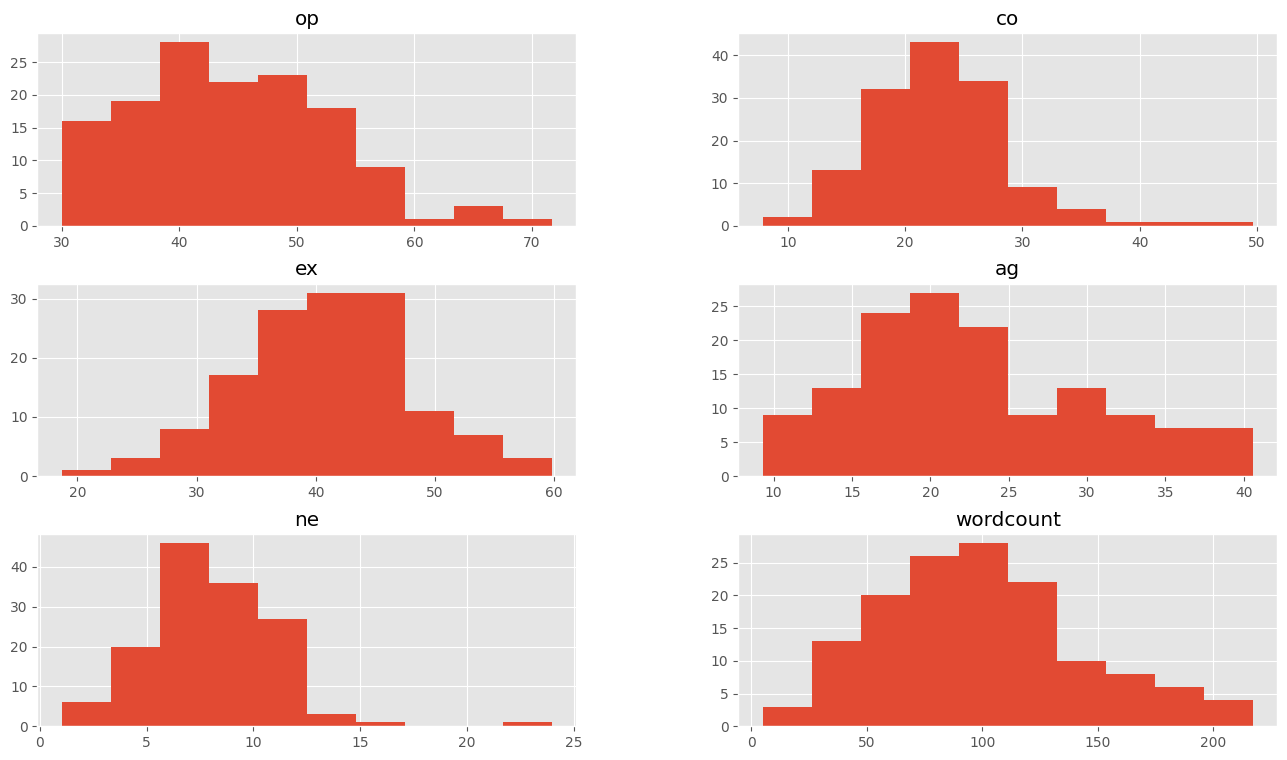

In [20]:
datos_twitter.drop(columns=['categoria']).hist()
plt.show()

##Problema tridimensional
Para el realizar un analísis de agrupamiento sencillo, se seleccionan 3 características mencionadas anteriormente.
1. op = Openness to experience - grado de apertura mental a nuevas experiencias.
2. ex = Extraversion - grado de timidez, solitario, o participación ante grupo social.
3. ag = agreeableness - grado de empatía con los demás, temperamento.

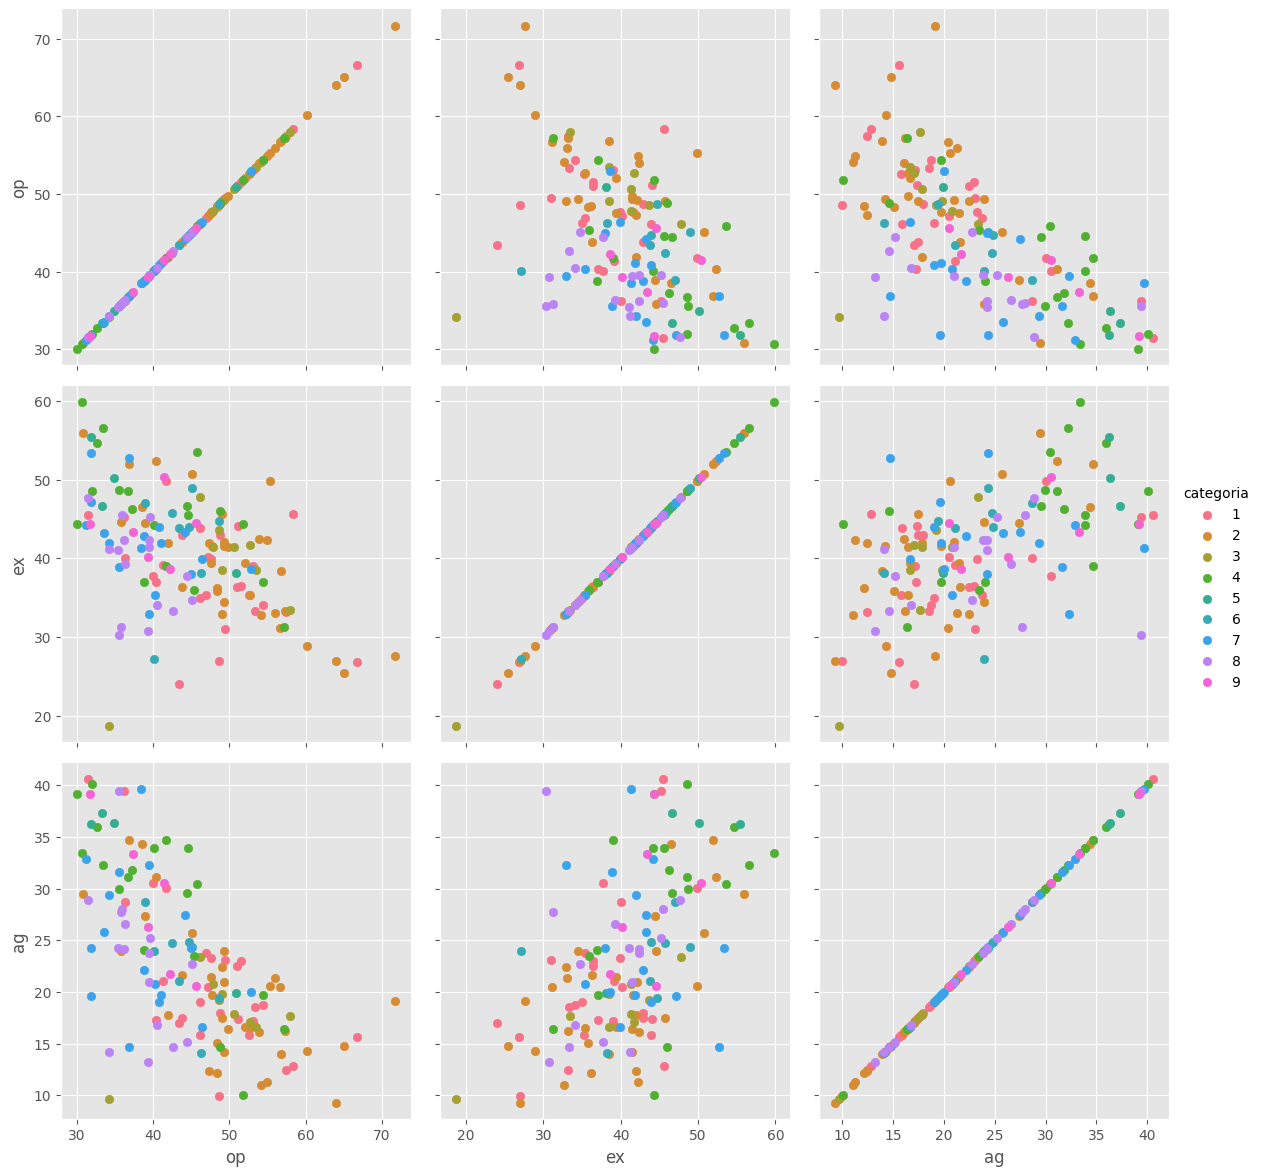

In [15]:
pg= sns.PairGrid(datos_twitter, hue="categoria",height=4, vars=["op","ex","ag"])
pg.map(plt.scatter)
pg.add_legend()
plt.show()

In [21]:
X = np.array(datos_twitter[["op","ex","ag"]])
y = np.array(datos_twitter['categoria'])

X.shape

(140, 3)

#Visualización de gráfica en 3D de la representación de las 9 categorías y las 3 características seleccionadas.

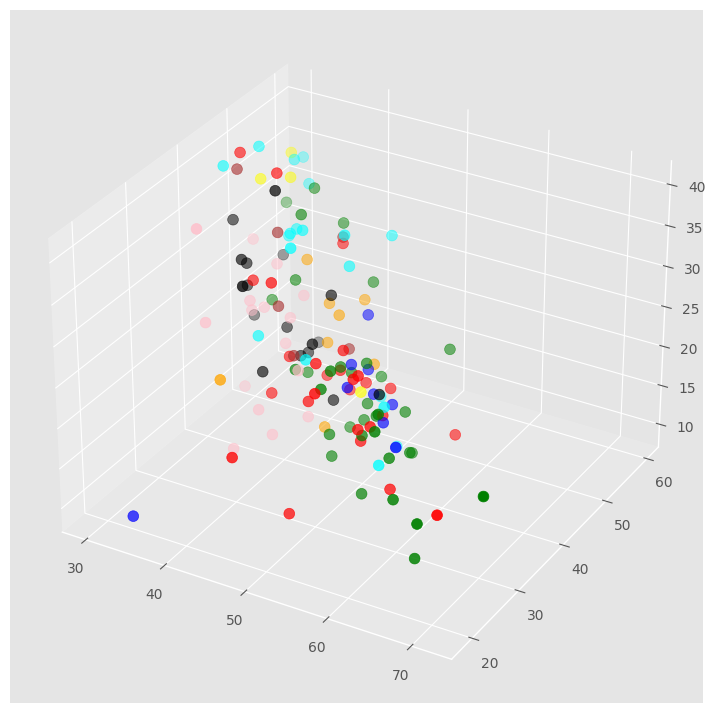

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")

colores_9 = ['blue', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'black', 'pink', 'brown', 'purple']
asignar = [colores_9[row] for row in y]
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)

plt.show()

#Aplicación de Agrupamiento por K-Means
Analísis de método de Elbow como guía para selección de clusters.

In [29]:
wcss = []

for i in range(2, 80):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

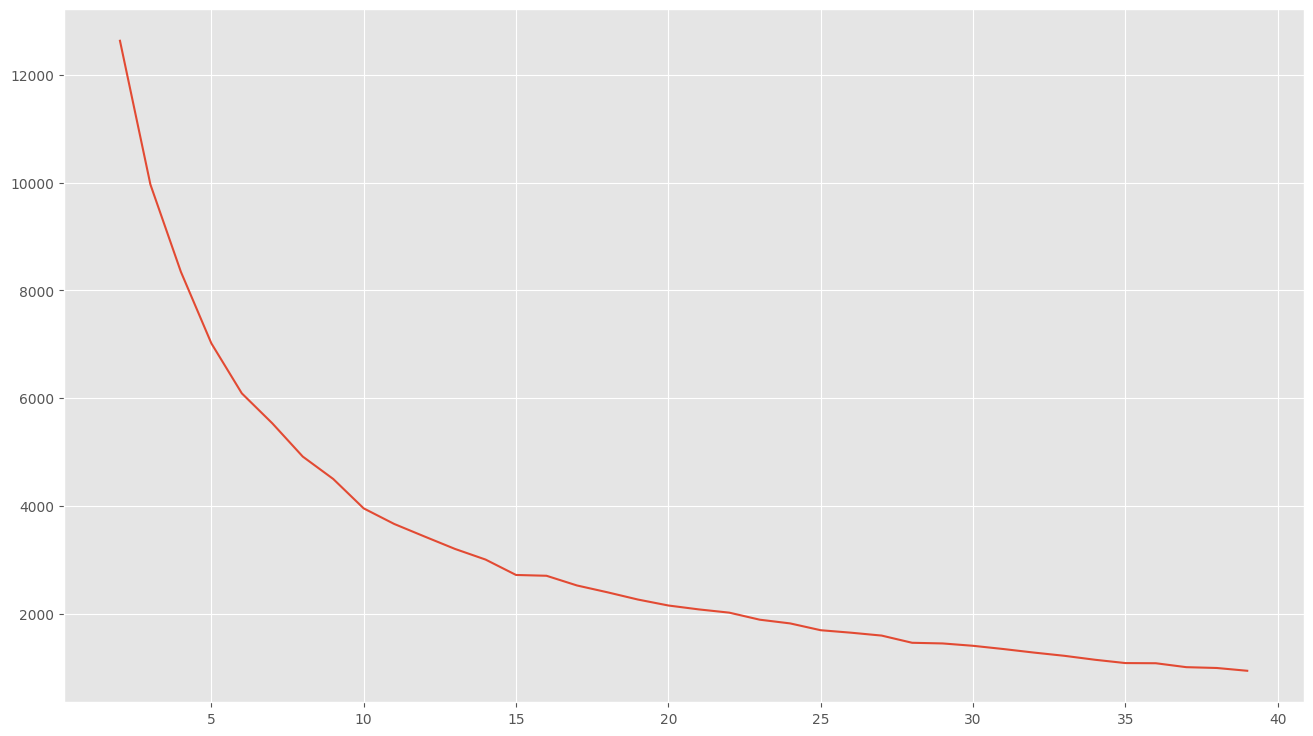

In [28]:
plt.plot(range(2, 40), wcss)
plt.show()

#Creación de 5 clusters


In [31]:
kmeans_5 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
y_kmeans_5 = kmeans_5.fit_predict(X)

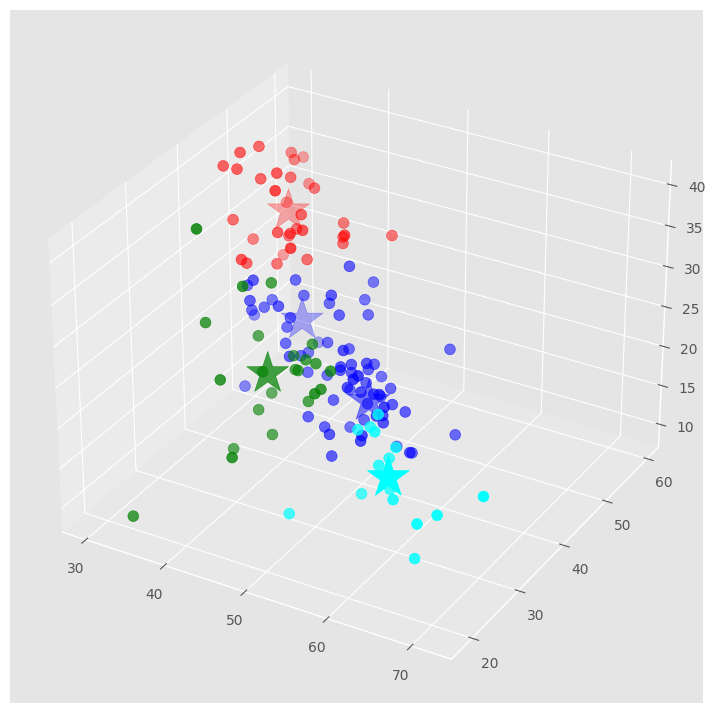

In [35]:
labels_5 = y_kmeans_5
C_5 = kmeans_5.cluster_centers_
colores_5 = colores_9[:5]
asignar_5 = [colores_5[row] for row in labels_5]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar_5, s=60)
ax.scatter(C_5[:, 0], C_5[:, 1], C_5[:, 2], marker='*', c=colores_5, s=1000)

#5 Clusters comparados con dos características.

In [ ]:
fi = datos_twitter

#Cantidad de usuarios por cada cluster generado.

#Cantidad de categorías por cada cluster.